# Market Price Prediction

This notebook focuses on predicting the market price (`selling_price_per_kg`) of crops based on various features such as crop type, location, quantity, and market conditions.

## Objectives
1. Load and explore the dataset.
2. List all available Market Access locations.
3. Preprocess the data (encoding, scaling).
4. Train a Machine Learning model (Random Forest).
5. Evaluate the model performance.

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")

## 1. Load Data

In [5]:
# Load the dataset
file_path = 'price_suggestion_dataset.csv'
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,date,commodity_group,crop_type,state_name,market_location,quantity_kg,quality_grade,season,transport_cost,demand_index,selling_price_per_kg
0,2023-01-01,Millet,Jowar (Sorghum),Andhra Pradesh,Banaganapalli,1000.0,3,Rabi,3.26,0.10,29.00
1,2023-01-01,Millet,Jowar (Sorghum),Andhra Pradesh,Alur,10.0,3,Rabi,4.94,0.10,28.60
2,2023-01-02,Oilseed,Sunflower,Andhra Pradesh,Kurnool,2300.0,2,Rabi,3.14,0.49,61.89
3,2023-01-02,Millet,Jowar (Sorghum),Andhra Pradesh,Alur,10.0,3,Rabi,4.94,0.10,28.60
4,2023-01-02,Millet,Jowar (Sorghum),Andhra Pradesh,Banaganapalli,1000.0,3,Rabi,3.26,0.10,29.00


## 2. Market Access List
Here we list all the unique market locations present in the dataset, which represent the market access points for farmers.

In [6]:
market_access_list = df['market_location'].unique()
print(f"Total Market Access Locations: {len(market_access_list)}")
print("List of Markets:")
for market in sorted(market_access_list):
    print(f"- {market}")

Total Market Access Locations: 9
List of Markets:
- Adoni
- Alur
- Banaganapalli
- Chintapally
- Kurnool
- Nandyal
- Rapur
- Tuni
- Yemmiganur


## 3. Data Preprocessing & EDA

In [7]:
# Check info and missing values
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  3179 non-null   object 
 1   commodity_group       3179 non-null   object 
 2   crop_type             3179 non-null   object 
 3   state_name            3179 non-null   object 
 4   market_location       3179 non-null   object 
 5   quantity_kg           3179 non-null   float64
 6   quality_grade         3179 non-null   int64  
 7   season                3179 non-null   object 
 8   transport_cost        3179 non-null   float64
 9   demand_index          3179 non-null   float64
 10  selling_price_per_kg  3179 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 273.3+ KB
None

Missing Values:
date                    0
commodity_group         0
crop_type               0
state_name              0
market_location         0
quantity_kg   

In [8]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract temporal features
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Drop original date column for training
df_train = df.drop(columns=['date'])

In [9]:
# Encode Categorical Variables
categorical_cols = ['commodity_group', 'crop_type', 'state_name', 'market_location', 'season']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

df_train.head()

,commodity_group,crop_type,state_name,market_location,quantity_kg,quality_grade,season,transport_cost,demand_index,selling_price_per_kg,month,day_of_week
0,0,3,0,2,1000.0,3,1,3.26,0.10,29.00,1,6
1,0,3,0,1,10.0,3,1,4.94,0.10,28.60,1,6
2,1,7,0,4,2300.0,2,1,3.14,0.49,61.89,1,0
3,0,3,0,1,10.0,3,1,4.94,0.10,28.60,1,0
4,0,3,0,2,1000.0,3,1,3.26,0.10,29.00,1,0


## 4. Model Training

In [10]:
# Define Features (X) and Target (y)
X = df_train.drop(columns=['selling_price_per_kg'])
y = df_train['selling_price_per_kg']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (2543, 11)
Testing shape: (636, 11)


In [11]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

## 5. Evaluation

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 4.86
R^2 Score: 0.87


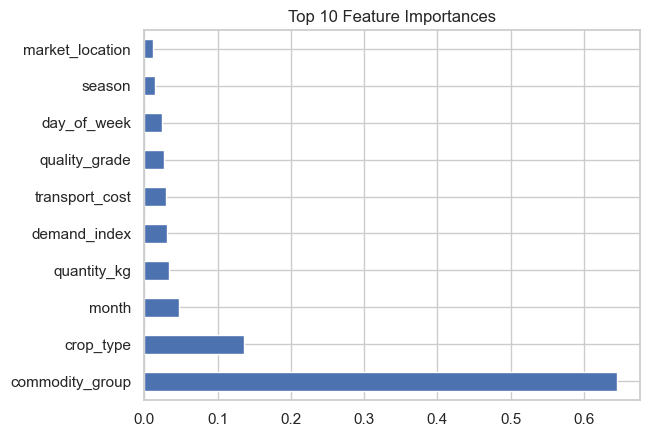

In [13]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()